
---


Integrantes:
*   Oziel Banda Hernández
*   Joshua Santiago Cruz Pérez
*   Naomi Daniela Jiménez Borzani
*   Ximena Paredes Hernández


---



# **EJERCICIO 24**

Parámetros orbitales estimados:
a = -2.635625
b = 0.143646
c = 0.551447
d = 3.222940
e = -0.432894


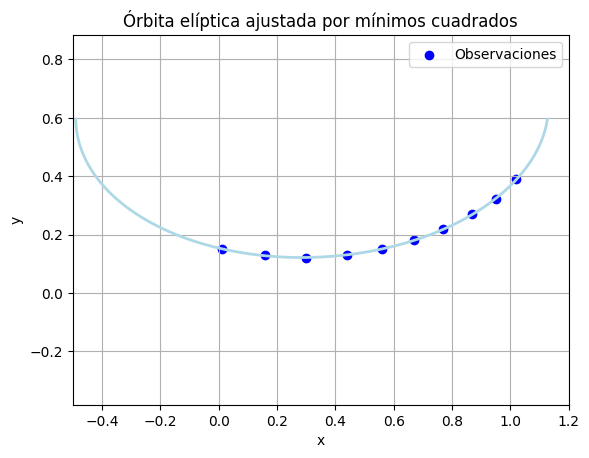

In [ ]:
"""
Ajuste de una órbita elíptica por mínimos cuadrados.

Este script estima los parámetros de una órbita elíptica utilizando una forma
implícita de la ecuación cuadrática general:

    a * y² + b * x * y + c * x + d * y + e = x²

Se realiza un ajuste por mínimos cuadrados para encontrar los coeficientes
[a, b, c, d, e] que mejor se ajustan a los datos proporcionados.

Pasos:
1. Se construyen la matriz A y el vector z con base en la ecuación.
2. Se resuelve el sistema normal (AᵀA)x = Aᵀz.
3. Se grafican los datos observados y la órbita ajustada.

Librerías utilizadas:
- numpy: Para operaciones matriciales y álgebra lineal.
- matplotlib.pyplot: Para graficar los resultados.

Datos utilizados:
- Datos_x: Coordenadas x observadas.
- Datos_y: Coordenadas y observadas.

Salida:
- Impresión de los parámetros estimados.
- Gráfica de los datos observados y la curva ajustada.

"""

import matplotlib.pyplot as plt  # Importar librería para graficar

# Datos observados (coordenadas x e y)
Datos_x = [1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01]
Datos_y = [0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15]

# Inicializar la matriz A y el vector z
A = []
z = []

# Construir A y z a partir de la ecuación implícita de la órbita
# (a * Y**2) + (b * X * Y) + (c * X) + (d * Y) + e = X**2
for x, y in zip(Datos_x, Datos_y):
    A.append([y**2, x*y, x, y, 1])  # Cada fila de A tiene estos términos
    z.append(x**2)                  # El vector z contiene los valores x²

# Resolver el sistema por mínimos cuadrados
import numpy as np
A = np.array(A)
z = np.array(z)

# Calcular las matrices del sistema normal (AᵀA)x = Aᵀz
AtA = A.T @ A
Atz = A.T @ z

# Invertir la matriz AtA
AtA_invertida = np.linalg.inv(AtA)

# Resolver el sistema para obtener los parámetros
parametros = AtA_invertida @ Atz

# Extraer los coeficientes a, b, c, d, e
a, b, c, d, e = parametros

# Imprimir los parámetros obtenidos
print("Parámetros orbitales estimados:")
print(f"a = {a:.6f}")
print(f"b = {b:.6f}")
print(f"c = {c:.6f}")
print(f"d = {d:.6f}")
print(f"e = {e:.6f}")

# Graficar los puntos observados y la órbita ajustada

# Crear una malla de valores X, Y para evaluar la curva
RangoX = np.linspace(-0.5, 1.2, 400)
RangoY = np.linspace(-0.1, 0.6, 400)
X, Y = np.meshgrid(RangoX, RangoY)

# Evaluar la función implícita de la órbita
Z = a * Y**2 + b * X * Y + c * X + d * Y + e - X**2

# Dibujar la curva ajustada (donde Z = 0) y los puntos observados
plt.contour(X, Y, Z, levels=[0], colors='lightblue', linewidths=2)
plt.scatter(Datos_x, Datos_y, color='blue', label='Observaciones')

# Etiquetas y título del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.title('Órbita elíptica ajustada por mínimos cuadrados')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Para mantener proporciones realistas
plt.show()
